# Gaussian Process (with Squidward)

In [8]:
# GP Package
from squidward import gpr
from squidward.kernels import distance, kernel_base

# For generating and visualizing data
import numpy as np
import generate_data as gd
import model_viz as mv
from visuals import regression
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, \
y_train, y_test, \
x_true, y_true = gd.get_data(N=500, 
                             limits=(-10, 10), 
                             missing_data=False, 
                             heteroscedastic=True)

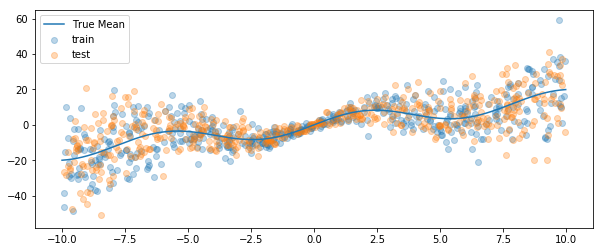

In [3]:
mv.demo_plot(x_train, y_train, x_test, y_test, x_true, y_true)

In [4]:
d = distance.RBF(2.0, 5.0**2)
kernel = kernel_base.Kernel(d, 'k1')
model = gpr.GaussianProcessInversion(kernel=kernel, var_l=10**2, inv_method='solve')
model.fit(x_train,y_train)

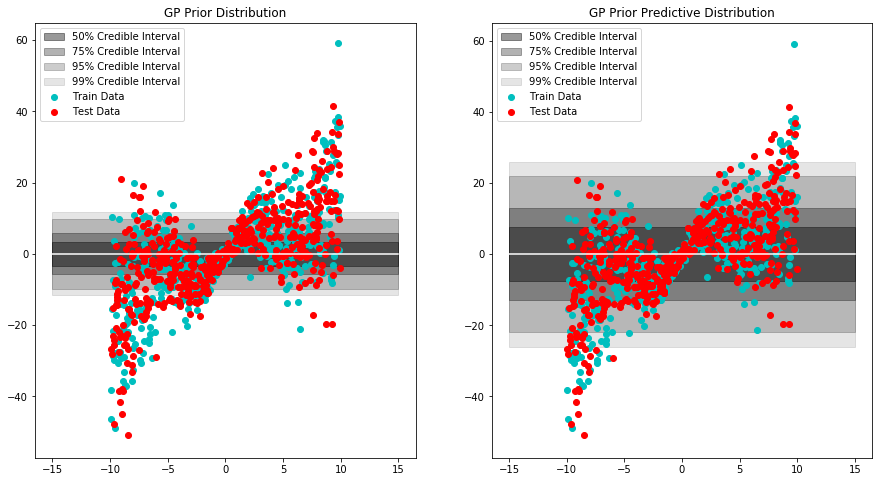

In [9]:
# generate data to plot prior of model
x = np.linspace(-15,15,100)

plt.figure(figsize=(15, 8))

mean, var = model.get_prior(x)

# plot prior 
plt.subplot(121)
plt.title("GP Prior Distribution")
regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()

mean, var = model.get_prior_predictive(x, False)

# plot prior predictive 
plt.subplot(122)
plt.title("GP Prior Predictive Distribution")
regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()

In [10]:
model.fit(x_train,y_train)

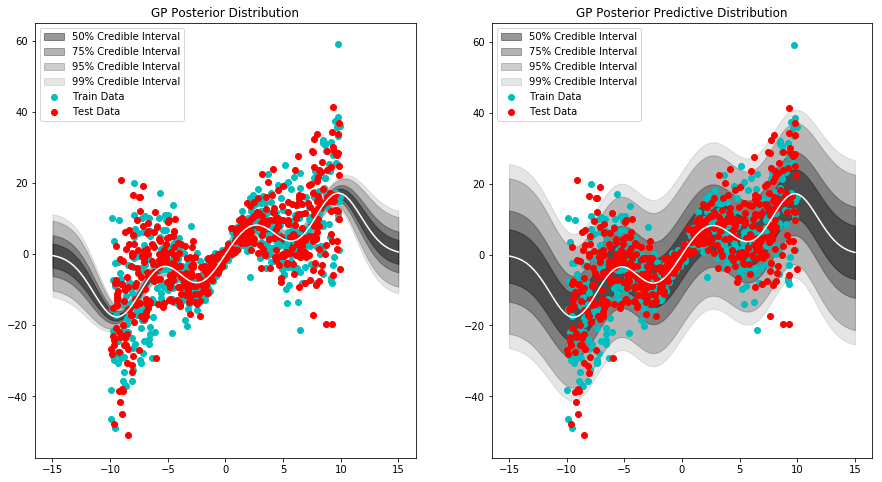

In [12]:
# generate data to plot prior of model
x = np.linspace(-15,15,100)

plt.figure(figsize=(15, 8))

mean, var = model.get_posterior(x)

# plot prior 
plt.subplot(121)
plt.title("GP Posterior Distribution")
regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()

mean, var = model.get_posterior_predictive(x, False)

# plot prior predictive 
plt.subplot(122)
plt.title("GP Posterior Predictive Distribution")
regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.legend()
plt.show()
